In [ ]:
import numpy
import scipy.special

class neuralNetwork:

    #신경망 초기화하기 임력/은닉/출력 노드 수, 학습률 설정
    def __init__(self,inputnodes, hiddennodes, outputnodes, learningrate):
        
        # 가중치 초기화
        # self.weights = []

        print("여기가 __init__ 시작입니다")

        # 입력, 은닉, 출력 노드 수 param 으로 받은 arg 로 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # 가중치 행렬 wih 와 who
        # 배열내가중치는 Wij 로표기. 노드1에서 다음 계층의 노드 j로 연결됨을 의미
        # 즉, w11 w12 행렬의 행과 열의 조합을 나타냄 by ***   
        # w11 w21
        # w12 w22 등

        #입력에서 은닉으로 가중치 와 입력 은닉값 조합
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        #은닉에서 출력으로 가중치 와 입력 은닉값 조합
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) 

        # Learning rate 학습율
        self.lr = learningrate

        #활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)

        print("여기가 __init__ 끝입니다")
        pass

    #신경망 학습시키기
    def train(self, inputs_list, targets_list):
        
        # param 으로 받은 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        print("inputs : ", inputs)
        print("targets : ", targets)

        # 은닉층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)

        print("hidden_inputs : ", hidden_inputs)
        print("hidden_outputs : ", hidden_outputs)


        # 최종출력계층으로들어오는신호를계산 
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종출력계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)

        print("final_inputs : ", final_inputs)
        print("final_outputs : ", final_outputs)


        # 오차는 (실제값 - 예측값)입니다.
        output_errors = targets - final_outputs

        print("output_errors : ", output_errors)

        # 역전파로 오차를 전달합니다.
        hidden_errors = numpy.dot(self.who.T, output_errors)

        print("hidden_errors : ", hidden_errors)

        # 가중치의 업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        print("self.who : ", self.who)
        print("self.wih : ", self.wih)
        
        print("여기가 train 끝입니다")
        pass

    #신경망에 질의하기
    def query(self, inputs_list):
        print("질의 시작")
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T

        # 은닉층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs) 
        # 위에서 간단한 코드로 모든 입력 값과 가중치를 연산함으로써 은닉계층의 각 노드로 들어오는 신호를 계산해 냅니다.

        # 은닉계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)

        # 최종출력계층으로들어오는신호를계산 
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종출력계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        print("여기가 추론 하는 곳입니다 final_outputs print 합니다.")
        print(final_outputs)

        #쥬피터에서 아래 리턴 동작안하는것 확인해야함~~
        print("여기가 추론 하는 곳입니다 final_outputs return 합니다.")
        return final_outputs

        # pass

#    def add_layer(self, layer):
#        self.weights.append(layer)
    
#    def forward(self, x):
#        for weight in self.weights:
#            x = self.activate(x @ weight)
#        return x
    
#    def activate(self, x):
#        return 1 / (1 + np.exp(-x))  # Sigmoid activation function    신경神經신경神經
pass

myNeural = neuralNetwork(3,3,3,0.3)
myNeural.train([1.0, 0.5, -1.5], [2.0, 1.5, -1.5])
myNeural.query([1.0, 0.5, -1.5])
print("Neural Network initialized.")


여기가 __init__ 시작입니다
여기가 __init__ 끝입니다
inputs :  [[ 1. ]
 [ 0.5]
 [-1.5]]
targets :  [[ 2. ]
 [ 1.5]
 [-1.5]]
hidden_inputs :  [[-0.31703488]
 [-0.61026161]
 [ 0.10227644]]
hidden_outputs :  [[0.42139854]
 [0.35199952]
 [0.52554684]]
final_inputs :  [[ 0.51372225]
 [-0.05275391]
 [-0.3074151 ]]
final_outputs :  [[0.62567865]
 [0.48681458]
 [0.42374581]]
output_errors :  [[ 1.37432135]
 [ 1.01318542]
 [-1.92374581]]
hidden_errors :  [[-2.39457917]
 [ 3.26932928]
 [ 2.09729791]]
self.who :  [[-0.40844151  0.93151304  0.78723445]
 [ 0.24205953 -0.09063999 -0.15029197]
 [ 0.975136   -1.16969162 -0.73830661]]
self.wih :  [[ 0.39884511 -0.16227091  0.83185846]
 [-0.01125218  0.30070248 -0.02243054]
 [-0.26249022  0.73216522 -0.36519168]]
여기가 train 끝입니다
질의 시작
여기가 추론 하는 곳입니다 final_outputs print 합니다.
[[0.71254968]
 [0.48012697]
 [0.30055315]]
여기가 추론 하는 곳입니다 final_outputs return 합니다.
Neural Network initialized.


In [15]:
import numpy
a = numpy.zeros( [3,2] ) 
print(a)    
numpy.random.rand(3,2) - 0.5

[[0. 0.]
 [0. 0.]
 [0. 0.]]


array([[ 0.14301639,  0.27939301],
       [ 0.2918897 , -0.11566778],
       [-0.3123712 , -0.28410014]])

******************************
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,

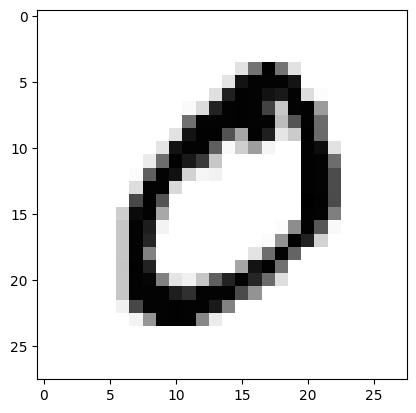

In [1]:
import numpy
import matplotlib.pyplot
import gzip
%matplotlib inline

# 훈련 데이터 로드하기 :: 책에 있는 소스로 gzip 적용 
with gzip.open("mnist_train.gz", 'r') as f:
    training_data_list = [x.decode('utf8').strip() for x in f.readlines()]

# data_file = open("mnist_train", "r")
# data_list = ata_file.readlines()
# data_file.close()

print("******************************")
print(training_data_list[0])
print(training_data_list.__len__())
print(training_data_list.count(0))
print(len(training_data_list))
print("******************************")

all_values = training_data_list[1].split(',')
image_array = numpy.asarray(all_values[1:], dtype=float).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')  

# convert pixel strings to float before dividing to avoid TypeError AI 가 수정
pixels = numpy.asarray(all_values[1:], dtype=float)
# print(pixels / 255.0)
scaled_input = (pixels / 255.0 * 0.99) + 0.01 
print(scaled_input)

#output nodes is1 0 (example) 
onodes = 10
targets = numpy.zeros (onodes) + 0.01 
targets[int(all_values [0])] = 0.99
print("output nodes is1 0 (example)")
print(targets)

In [ ]:
#output nodes is1 0 (example) 
onodes = 10
targets = numpy.zeros (onodes) + 0.01 
targets[int(all_values [0])] = 0.99